In [1]:
library(NanoStringNCTools)
library(fpc)
library(plotly)
library(knitr)
library(GeomxTools)
library(GeoMxWorkflows)
library(ggplot2)
library(scales)
library(dplyr)
library(ggforce)
library(reshape2)

cd45_color = '#F8766D'
ck_color = '#00BA38'
cd68_color = '#619CFF'

Loading required package: Biobase

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, saveRDS, setdiff,
    table, tapply, union, unique, unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The following object is masked from ‘

# Load Data

In [4]:
DCCFiles <- dir(file.path("dccs"), pattern = ".dcc$",
                full.names = TRUE, recursive = TRUE)
PKCFiles <- file.path("Hs_R_NGS_WTA_v1.0.pkc")
SampleAnnotationFile <- "annotations_with_proximity_score.xlsx"

# load data
demoData <- readNanoStringGeoMxSet(dccFiles = DCCFiles,
                           pkcFiles = PKCFiles,
                           phenoDataFile = SampleAnnotationFile,
                           phenoDataSheet = "Sheet1",
                           phenoDataDccColName = "Sample_ID"
                           #protocolDataColNames = c("aoi"),
                           #experimentDataColNames = c("panel")
                           )


pkcs <- annotation(demoData)
modules <- gsub(".pkc", "", pkcs)
kable(data.frame(PKCs = pkcs, modules = modules))

Warning message in readNanoStringGeoMxSet(dccFiles = DCCFiles, pkcFiles = PKCFiles, :
“Annotations missing for the following: DSP-1001660005664-D-A01.dcc, DSP-1001660005664-D-B04.dcc, DSP-1001660005664-D-B05.dcc, DSP-1001660005664-D-B06.dcc, DSP-1001660005664-D-B07.dcc, DSP-1001660005664-D-B08.dcc, DSP-1001660005664-D-B09.dcc, DSP-1001660005664-D-B10.dcc, DSP-1001660005664-D-B11.dcc, DSP-1001660005664-D-C01.dcc, DSP-1001660005664-D-C10.dcc, DSP-1001660005664-D-C11.dcc, DSP-1001660005664-D-C12.dcc, DSP-1001660005664-D-D01.dcc, DSP-1001660005664-D-D02.dcc, DSP-1001660005664-D-D03.dcc, DSP-1001660008514-G-A01.dcc, DSP-1001660008514-G-A02.dcc, DSP-1001660008514-G-A03.dcc, DSP-1001660008514-G-A04.dcc, DSP-1001660008514-G-A05.dcc, DSP-1001660008514-G-A06.dcc, DSP-1001660008514-G-A07.dcc, DSP-1001660008514-G-A08.dcc, DSP-1001660008514-G-A09.dcc, DSP-1001660008514-G-A10.dcc, DSP-1001660008514-G-A11.dcc, DSP-1001660008514-G-A12.dcc, DSP-1001660008514-G-B01.dcc, DSP-1001660008514-G-B02.dcc, DSP-



|PKCs                  |modules           |
|:---------------------|:-----------------|
|Hs_R_NGS_WTA_v1.0.pkc |Hs_R_NGS_WTA_v1.0 |

In [5]:
dim(pData(demoData[,pData(demoData)$pancreas_colon == 'pancreas']))

[1] 253  24

# Sample Overview

In [6]:
# Shift counts to one
demoData <- shiftCountsOne(demoData, useDALogic = TRUE)

#Exclude Patient 10 and 11 Include only Pacnreas
ind <- pData(demoData)$pancreas_colon == "pancreas"
demoData <- demoData[, ind]
demoData <- demoData[,pData(demoData)$patient_id != "pancreas_patient_11"]
demoData <- demoData[,pData(demoData)$patient_id != "pancreas_patient_10"]
#demoData <- demoData[,!is.na(pData(demoData)$location)]
demoData$metastasis_location[is.na(demoData$metastasis_location)] <- 'primitive'
#Replace tsip and border
pData(demoData)$specific_location <- pData(demoData)$location

pData(demoData)$location[pData(demoData)$location == 'tsip'] <- 'intra-tumor'
pData(demoData)$location[pData(demoData)$location == 'border'] <- 'extra-tumor'

# Rename patients
pData(demoData)$patient_id[pData(demoData)$patient_id == 'pancreas_patient_2'] <- 'pancreas patient 1'
pData(demoData)$patient_id[pData(demoData)$patient_id == 'pancreas_patient_4'] <- 'pancreas patient 2'
pData(demoData)$patient_id[pData(demoData)$patient_id == 'pancreas_patient_5'] <- 'pancreas patient 3'
pData(demoData)$patient_id[pData(demoData)$patient_id == 'pancreas_patient_6'] <- 'pancreas patient 4'
pData(demoData)$patient_id[pData(demoData)$patient_id == 'pancreas_patient_7'] <- 'pancreas patient 5'
pData(demoData)$patient_id[pData(demoData)$patient_id == 'pancreas_patient_8'] <- 'pancreas patient 6'
pData(demoData)$patient_id[pData(demoData)$patient_id == 'pancreas_patient_9'] <- 'pancreas patient 7'
#pData(demoData)$patient_id[pData(demoData)$patient_id == 'pancreas_patient_10'] <- 'pancreas patient 8'
#pData(demoData)$patient_id[pData(demoData)$patient_id == 'pancreas_patient_11'] <- 'pancreas patient 9'

pData(demoData)$patient_id[pData(demoData)$patient_id == 'colon_patient_1'] <- 'colon patient 1'
pData(demoData)$patient_id[pData(demoData)$patient_id == 'colon_patient_2'] <- 'colon patient 2'
pData(demoData)$patient_id[pData(demoData)$patient_id == 'colon_patient_3'] <- 'colon patient 3'
pData(demoData)$patient_id[pData(demoData)$patient_id == 'colon_patient_4'] <- 'colon patient 4'

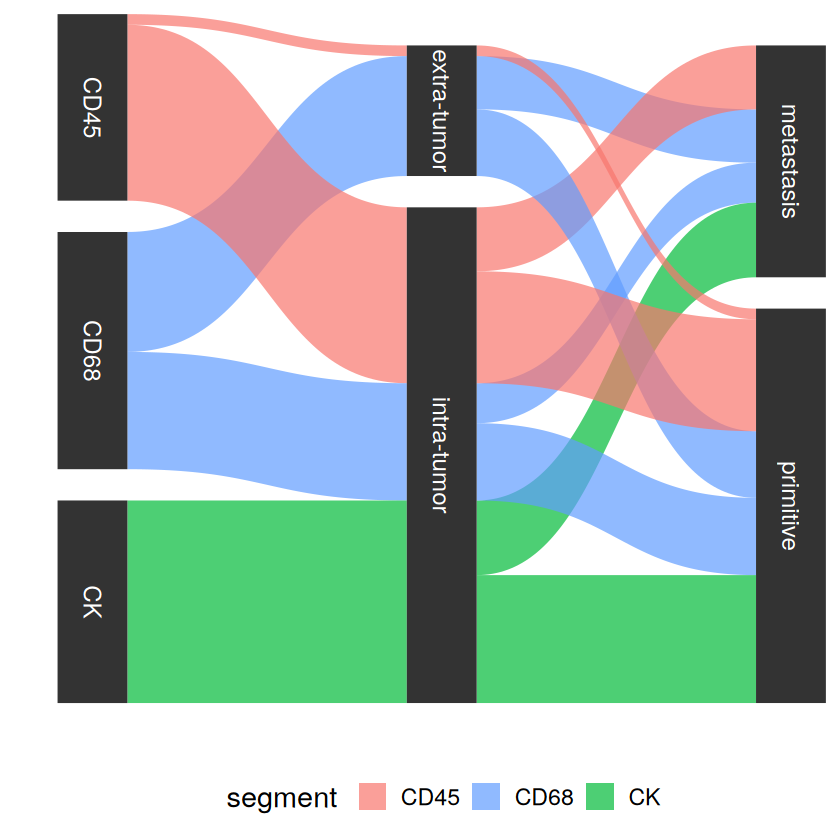

In [7]:
sankey_plot <- function(df,columns){
data <- table(df[,columns])
data <- reshape2::melt(data)
data <- gather_set_data(data, 1:3)
# Create the parallel sets diagram
ggplot(data, aes(x, id = id, split = y,value=value)) +
 geom_parallel_sets(aes(fill = segment), alpha = .7, axis.width = 0.2,sep = 0.05) +
 geom_parallel_sets_axes(axis.width = 0.2,sep = 0.05) +
 scale_fill_manual(values = c("CK" = ck_color, "CD45" = cd45_color,'CD68'=cd68_color)) +
    geom_parallel_sets_labels(color = "white", size = 5) +
    theme_classic(base_size = 17) + 
    theme(legend.position = "bottom",
          axis.ticks.y = element_blank(),
          axis.line = element_blank(),
          axis.text.y = element_blank()) +
    scale_y_continuous(expand = expansion(0)) + 
    scale_x_discrete(expand = expansion(0)) +
    labs(x = "", y = "") 
    }
sankey_plot(pData(demoData),c('segment','location','primitive_metastasis'))

# QC & Pre-processing

## Select Segment QC

In [8]:
###### Default QC cutoffs are commented in () adjacent to the respective parameters
# study-specific values were selected after visualizing the QC results in more
# detail below
QC_params <-
        list(minSegmentReads = 1000, # Minimum number of reads (1000)
             percentTrimmed = 80,    # Minimum % of reads trimmed (80%)
             percentStitched = 80,   # Minimum % of reads stitched (80%)
             percentAligned = 75,    # Minimum % of reads aligned (80%)
             percentSaturation = 50, # Minimum sequencing saturation (50%)
             minNegativeCount = 1,   # Minimum negative control counts (10)
             maxNTCCount = 9000,     # Maximum counts observed in NTC well (1000)
             minNuclei = 20,         # Minimum # of nuclei estimated (100)
             minArea = 1000)         # Minimum segment area (5000)
demoData <-
        setSegmentQCFlags(demoData, 
                          qcCutoffs = QC_params)        

# Collate QC Results
QCResults <- protocolData(demoData)[["QCFlags"]]
flag_columns <- colnames(QCResults)
QC_Summary <- data.frame(Pass = colSums(!QCResults[, flag_columns]),
                         Warning = colSums(QCResults[, flag_columns]))
QCResults$QCStatus <- apply(QCResults, 1L, function(x) {
                                    ifelse(sum(x) == 0L, "PASS", "WARNING")
                         })
QC_Summary["TOTAL FLAGS", ] <-
        c(sum(QCResults[, "QCStatus"] == "PASS"),
          sum(QCResults[, "QCStatus"] == "WARNING"))

## Visualize Segment QC

In [9]:
print(colnames(pData(demoData)))

 [1] "slide name"                "roi"                      
 [3] "segment"                   "segment_area"             
 [5] "roi_area"                  "nuclei"                   
 [7] "cd68_type"                 "segment_nuclei"           
 [9] "pancreas_colon"            "primitive_metastasis"     
[11] "metastasis_location"       "patient_id"               
[13] "location"                  "ck_score"                 
[15] "cd45_score"                "cd68_score"               
[17] "NOIGR"                     "date sample"              
[19] "stage"                     "type of chemo"            
[21] "treatment_duration_months" "Sex"                      
[23] "date of birth"             "patient id"               
[25] "specific_location"        


Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”


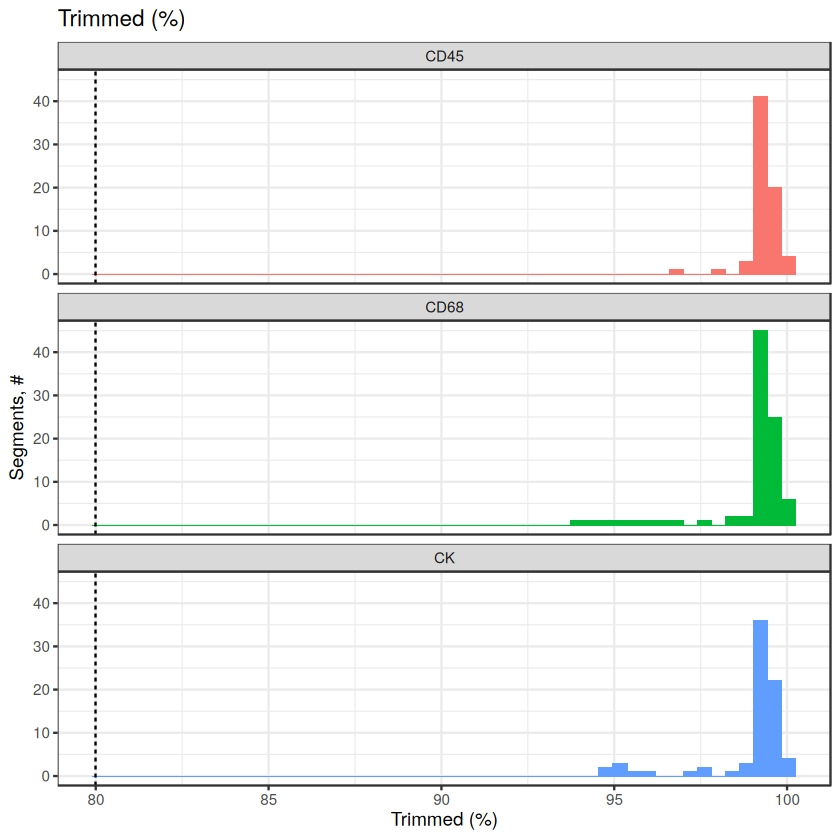

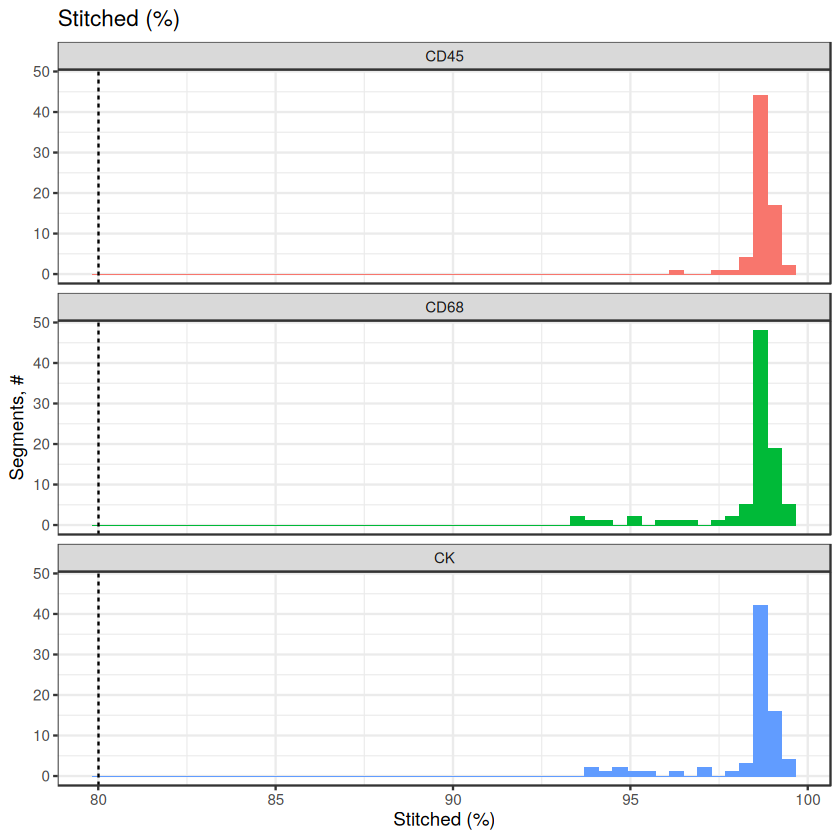

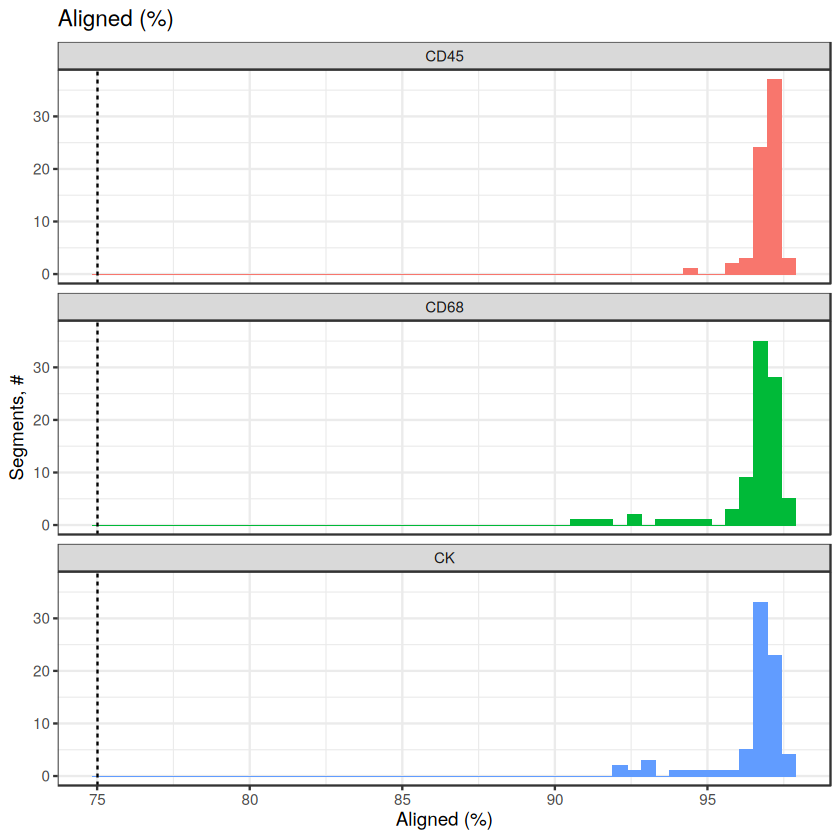

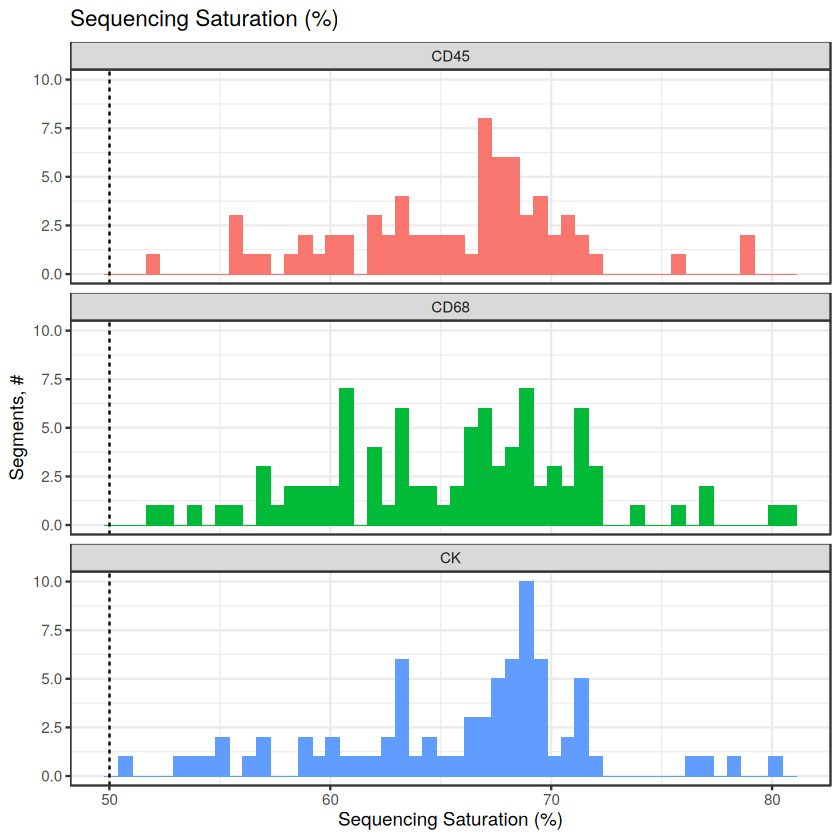

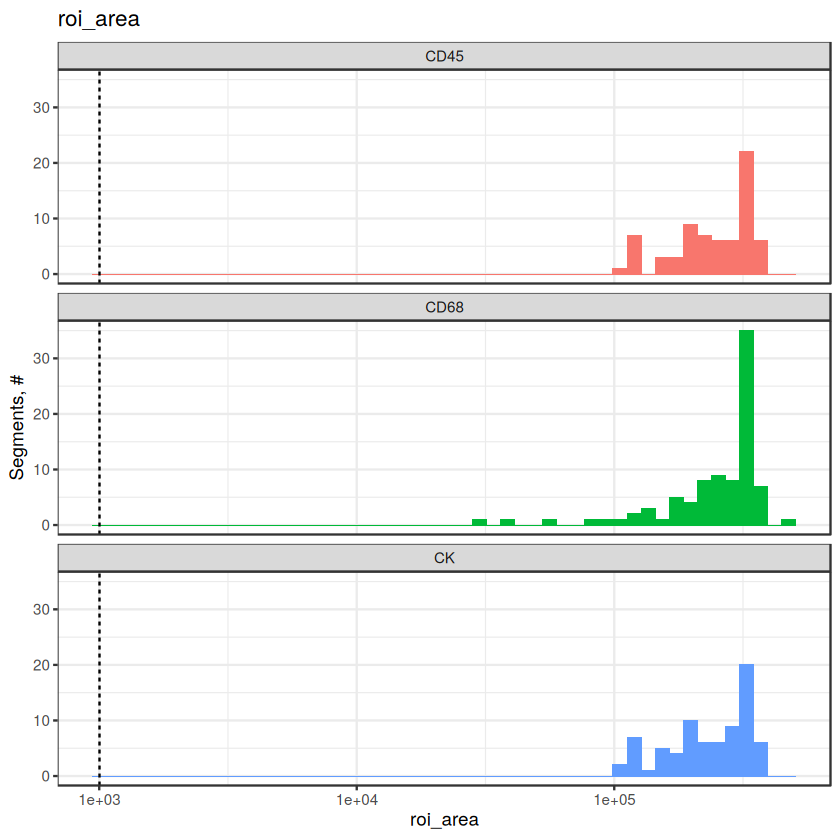

ERROR: Error in dimnames(x) <- dn: length of 'dimnames' [2] not equal to array extent


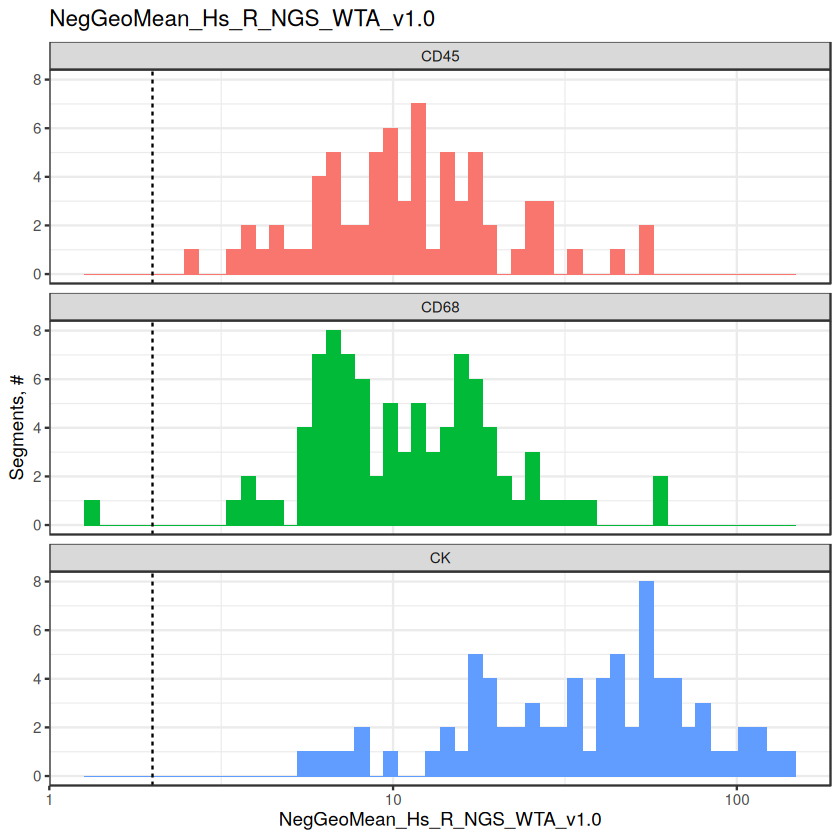

In [10]:
col_by <- "segment"

# Graphical summaries of QC statistics plot function
QC_histogram <- function(assay_data = NULL,
                         annotation = NULL,
                         fill_by = NULL,
                         thr = NULL,
                         scale_trans = NULL) {
        plt <- ggplot(assay_data,
                      aes_string(x = paste0("unlist(`", annotation, "`)"),
                                 fill = fill_by)) +
        geom_histogram(bins = 50) +
        geom_vline(xintercept = thr, lty = "dashed", color = "black") +
        theme_bw() + guides(fill = "none") +
        facet_wrap(as.formula(paste("~", fill_by)), nrow = 4) +
        labs(x = annotation, y = "Segments, #", title = annotation)
        if(!is.null(scale_trans)) { 
                plt <- plt + scale_x_continuous(trans = scale_trans) 
                }
                plt
        }

QC_histogram(sData(demoData), "Trimmed (%)", col_by, 80)
QC_histogram(sData(demoData), "Stitched (%)", col_by, 80)
QC_histogram(sData(demoData), "Aligned (%)", col_by, 75)
QC_histogram(sData(demoData), "Saturated (%)", col_by, 50) +
            labs(title = "Sequencing Saturation (%)",
                          x = "Sequencing Saturation (%)")
QC_histogram(sData(demoData), "roi_area", col_by, 1000, scale_trans = "log10")
#QC_histogram(sData(demoData), "nuclei", col_by, 20)
# calculate the negative geometric means for each module
negativeGeoMeans <- 
            esBy(negativeControlSubset(demoData), 
                 GROUP = "Module", 
                 FUN = function(x) { 
                         assayDataApply(x, MARGIN = 2, FUN = ngeoMean, elt = "exprs") 
                 }) 

protocolData(demoData)[["NegGeoMean"]] <- negativeGeoMeans

# explicitly copy the Negative geoMeans from sData to pData
negCols <- paste0("NegGeoMean_", modules)
pData(demoData)[, negCols] <- sData(demoData)[["NegGeoMean"]]
for(ann in negCols) {
            plt <- QC_histogram(pData(demoData), ann, col_by, 2, scale_trans = "log10")
    print(plt)
}

# detatch neg_geomean columns ahead of aggregateCounts call
pData(demoData) <- pData(demoData)[, !colnames(pData(demoData)) %in% negCols]

# show all NTC values, Freq = # of Segments with a given NTC count:
kable(table(NTC_Count = sData(demoData)$NTC),
            col.names = c("NTC Count", "# of Segments"))

kable(QC_Summary, caption = "QC Summary Table for each Segment")
demoData <- demoData[, QCResults$QCStatus == "PASS"]
# Subsetting our dataset has removed samples which did not pass QC

dim(demoData)

# Probe QC

## Set Probe QC Flags

In [11]:
# Generally keep the qcCutoffs parameters unchanged. Set removeLocalOutliers to 
# FALSE if you do not want to remove local outliers
demoData <- setBioProbeQCFlags(demoData, 
                               qcCutoffs = list(minProbeRatio = 0.1,
                                                percentFailGrubbs = 20), 
                               removeLocalOutliers = TRUE)

ProbeQCResults <- fData(demoData)[["QCFlags"]]

# Define QC table for Probe QC
qc_df <- data.frame(Passed = sum(rowSums(ProbeQCResults[, -1]) == 0),
                    Global = sum(ProbeQCResults$GlobalGrubbsOutlier),
                    Local = sum(rowSums(ProbeQCResults[, -2:-1]) > 0
                                & !ProbeQCResults$GlobalGrubbsOutlier))
kable(qc_df)



| Passed| Global| Local|
|------:|------:|-----:|
|  18785|      0|    30|

## Exclude Outlier Probes

In [12]:
#Subset object to exclude all that did not pass Ratio & Global testing
ProbeQCPassed <- 
        subset(demoData, 
               fData(demoData)[["QCFlags"]][,c("LowProbeRatio")] == FALSE &
                       fData(demoData)[["QCFlags"]][,c("GlobalGrubbsOutlier")] == FALSE)
print("Probe QC Passed")
print(dim(ProbeQCPassed))
demoData <- ProbeQCPassed

[1] "Probe QC Passed"
Features  Samples 
   18815      235 


# Create Gene-level Count Data

In [13]:
# Check how many unique targets the object has
length(unique(featureData(demoData)[["TargetName"]]))

# collapse to targets
print(" collapse to targets ")
target_demoData <- aggregateCounts(demoData)

dim(target_demoData)
print("dim(target_demoData) before filtering")
print(dim(target_demoData))

print("Create Gene-level Count Data ")
exprs(target_demoData)[1:5, 1:2]

# Define LOQ SD threshold and minimum value
cutoff <- 2
minLOQ <- 2
print(colnames(pData(target_demoData)))
# Calculate LOQ per module tested
LOQ <- data.frame(row.names = rownames(pData(target_demoData)))
for(module in modules) {
        vars <- paste0(c("NegGeoMean_", "NegGeoSD_"),
                       module)
        if(all(vars[1:2] %in% colnames(pData(target_demoData)))) {
                LOQ[, module] <-
                pmax(minLOQ,
                pData(target_demoData)[, vars[1]] * 
                pData(target_demoData)[, vars[2]] ^ cutoff)
        }
}

pData(target_demoData)$LOQ <- as.matrix(LOQ)
head(pData(target_demoData))

[1] 18677

[1] " collapse to targets "


Features  Samples 
   18677      235

[1] "dim(target_demoData) before filtering"
Features  Samples 
   18677      235 
[1] "Create Gene-level Count Data "


,DSP-1001660005664-D-A02.dcc,DSP-1001660005664-D-A03.dcc
A2M,147,66
NAT2,10,24
ACADM,11,27
ACADS,10,35
ACAT1,15,42


 [1] "slide name"                   "roi"                         
 [3] "segment"                      "segment_area"                
 [5] "roi_area"                     "nuclei"                      
 [7] "cd68_type"                    "segment_nuclei"              
 [9] "pancreas_colon"               "primitive_metastasis"        
[11] "metastasis_location"          "patient_id"                  
[13] "location"                     "ck_score"                    
[15] "cd45_score"                   "cd68_score"                  
[17] "NOIGR"                        "date sample"                 
[19] "stage"                        "type of chemo"               
[21] "treatment_duration_months"    "Sex"                         
[23] "date of birth"                "patient id"                  
[25] "specific_location"            "NegGeoMean_Hs_R_NGS_WTA_v1.0"
[27] "NegGeoSD_Hs_R_NGS_WTA_v1.0"  


,slide name,roi,segment,segment_area,roi_area,nuclei,cd68_type,segment_nuclei,pancreas_colon,primitive_metastasis,⋯,stage,type of chemo,treatment_duration_months,Sex,date of birth,patient id,specific_location,NegGeoMean_Hs_R_NGS_WTA_v1.0,NegGeoSD_Hs_R_NGS_WTA_v1.0,LOQ
,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,⋯,<chr>,<chr>,<dbl>,<chr>,<dttm>,<dbl>,<chr>,<dbl>,<dbl>,"<dbl[,1]>"
DSP-1001660005664-D-A02.dcc,11H01838.06 PRIMITIVE 07-07-2022,1,CD68,9882.65,380772.7,1596.0,stromal,82,pancreas,primitive,⋯,Stage IIB,0,0,M,1939-08-18,2,intra-tumor,8.774346,1.436221,18.09911
DSP-1001660005664-D-A03.dcc,11H01838.06 PRIMITIVE 07-07-2022,1,CK,16411.10,380772.7,1596.0,stromal,168,pancreas,primitive,⋯,Stage IIB,0,0,M,1939-08-18,2,intra-tumor,18.554467,1.397690,36.24685
DSP-1001660005664-D-A04.dcc,11H01838.06 PRIMITIVE 07-07-2022,1,CD45,10225.03,380772.7,1596.0,stromal,212,pancreas,primitive,⋯,Stage IIB,0,0,M,1939-08-18,2,intra-tumor,9.621568,1.486549,21.26200
DSP-1001660005664-D-A05.dcc,11H01838.06 PRIMITIVE 07-07-2022,2,CD68,11826.25,203265.4,203265.4,stromal,116,pancreas,primitive,⋯,Stage IIB,0,0,M,1939-08-18,2,intra-tumor,13.926807,1.445223,29.08850
DSP-1001660005664-D-A06.dcc,11H01838.06 PRIMITIVE 07-07-2022,2,CK,11644.71,203265.4,203265.4,stromal,108,pancreas,primitive,⋯,Stage IIB,0,0,M,1939-08-18,2,intra-tumor,17.263877,1.383749,33.05621
DSP-1001660005664-D-A07.dcc,11H01838.06 PRIMITIVE 07-07-2022,2,CD45,6573.52,203265.4,203265.4,stromal,113,pancreas,primitive,⋯,Stage IIB,0,0,M,1939-08-18,2,intra-tumor,6.800638,1.651932,18.55813


# Filtering

In [14]:
LOQ_Mat <- c()
for(module in modules) {
        ind <- fData(target_demoData)$Module == module
        Mat_i <- t(esApply(target_demoData[ind, ], MARGIN = 1,
                           FUN = function(x) {
                                   x > LOQ[, module]
                           }))
        LOQ_Mat <- rbind(LOQ_Mat, Mat_i)
}
# ensure ordering since this is stored outside of the geomxSet
LOQ_Mat <- LOQ_Mat[fData(target_demoData)$TargetName, ]

## Segment Gene Detection

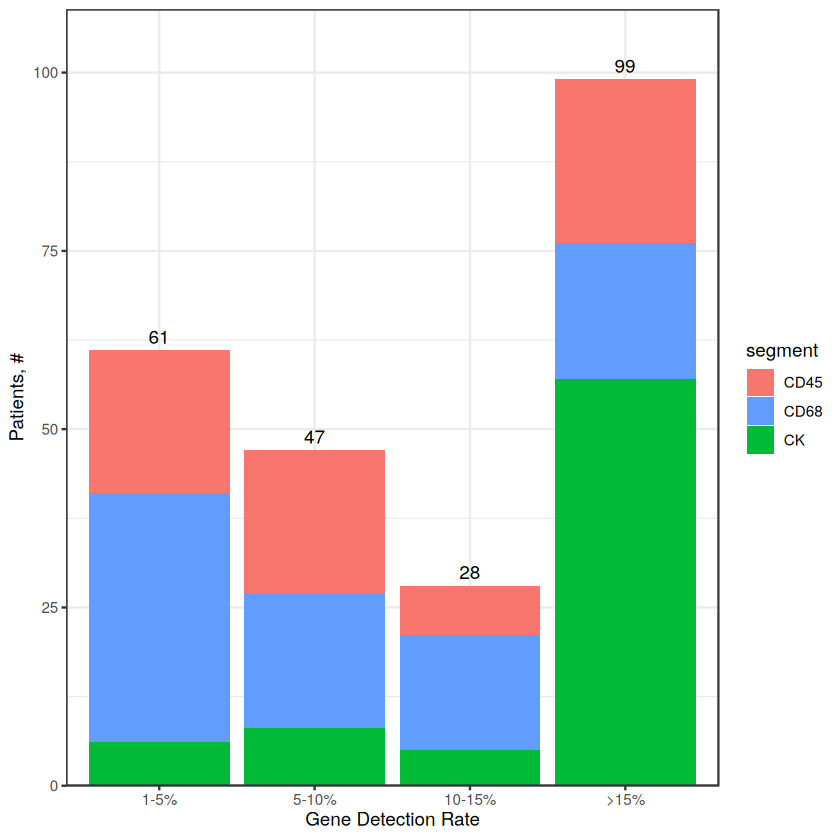

In [15]:
# Save detection rate information to pheno data
pData(target_demoData)$GenesDetected <- 
        colSums(LOQ_Mat, na.rm = TRUE)
pData(target_demoData)$GeneDetectionRate <-
        pData(target_demoData)$GenesDetected / nrow(target_demoData)

# Determine detection thresholds: 1%, 5%, 10%, 15%, >15%
pData(target_demoData)$DetectionThreshold <- 
        cut(pData(target_demoData)$GeneDetectionRate,
            breaks = c(0, 0.01, 0.05, 0.1, 0.15, 1),
            labels = c("<1%", "1-5%", "5-10%", "10-15%", ">15%"))

# stacked bar plot of different cut points (1%, 5%, 10%, 15%)
ggplot(pData(target_demoData),
       aes(x = DetectionThreshold)) +
geom_bar(aes(fill = segment)) +
geom_text(stat = "count", aes(label = after_stat(count)), vjust = -0.5) +
scale_fill_manual(values = c("CK" = ck_color, "CD45" = cd45_color,'CD68'=cd68_color)) +
theme_bw() +
scale_y_continuous(expand = expansion(mult = c(0, 0.1))) +
labs(x = "Gene Detection Rate",
     y = "Patients, #",
     fill = "segment")

# cut percent genes detected at 1, 5, 10, 15
#kable(table(pData(target_demoData)$DetectionThreshold,pData(target_demoData)$class))
#print("filter out segments with exceptionally low signal")

In [16]:
#library(xtable)
#xtable(t(table(pData(target_demoData)$DetectionThreshold, pData(target_demoData)$patient_id)))
print("dim(target_demoData) after filtering")
print(dim(target_demoData))
target_demoData <- target_demoData[, pData(target_demoData)$GeneDetectionRate >= .01]
print("dim(target_demoData) after filtering")
print(dim(target_demoData))
dim(target_demoData)

[1] "dim(target_demoData) after filtering"
Features  Samples 
   18677      235 
[1] "dim(target_demoData) after filtering"
Features  Samples 
   18677      235 


Features  Samples 
   18677      235

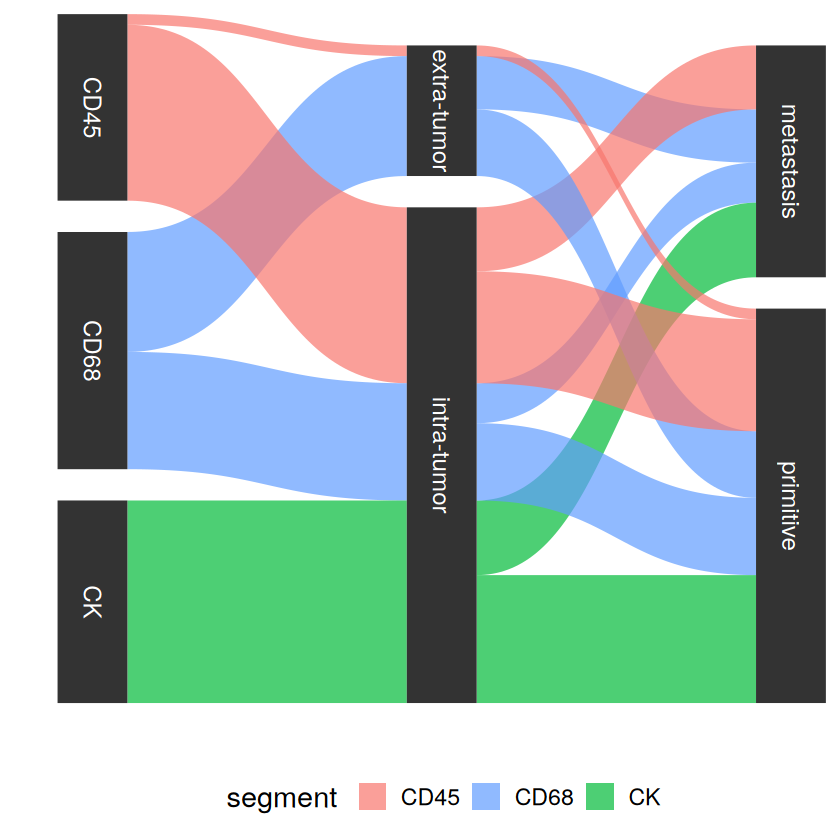

In [17]:
sankey_plot(pData(target_demoData),c('segment','location','primitive_metastasis'))

## Gene Detection Rate

[1] "dim(target_demoData)"
Features  Samples 
   13148      235 


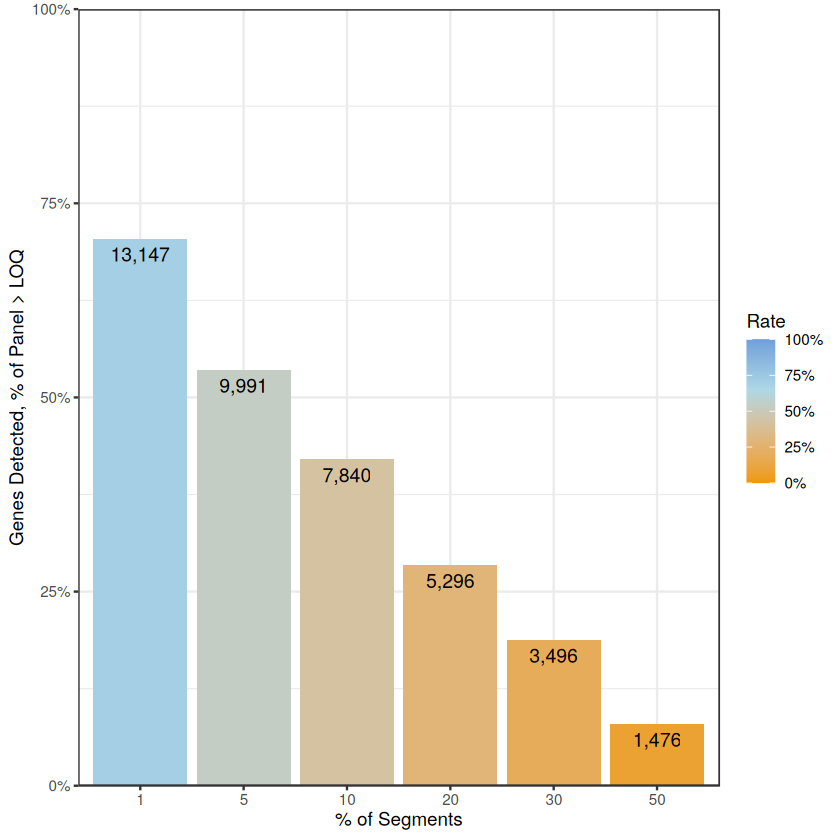

In [18]:
# Calculate detection rate:
LOQ_Mat <- LOQ_Mat[, colnames(target_demoData)]
fData(target_demoData)$DetectedSegments <- rowSums(LOQ_Mat, na.rm = TRUE)
fData(target_demoData)$DetectionRate <-
        fData(target_demoData)$DetectedSegments / nrow(pData(target_demoData))


# Plot detection rate:
plot_detect <- data.frame(Freq = c(1, 5, 10, 20, 30, 50))
plot_detect$Number <-
        unlist(lapply(c(0.01, 0.05, 0.1, 0.2, 0.3, 0.5),
                      function(x) {sum(fData(target_demoData)$DetectionRate >= x)}))
plot_detect$Rate <- plot_detect$Number / nrow(fData(target_demoData))
rownames(plot_detect) <- plot_detect$Freq

ggplot(plot_detect, aes(x = as.factor(Freq), y = Rate, fill = Rate)) +
        geom_bar(stat = "identity") +
        geom_text(aes(label = formatC(Number, format = "d", big.mark = ",")),
                  vjust = 1.6, color = "black", size = 4) +
scale_fill_gradient2(low = "orange2", mid = "lightblue",
                     high = "dodgerblue3", midpoint = 0.65,
                     limits = c(0,1),
                     labels = scales::percent) +
theme_bw() +
scale_y_continuous(labels = scales::percent, limits = c(0,1),
                   expand = expansion(mult = c(0, 0))) +
labs(x = "% of Segments",y = "Genes Detected, % of Panel > LOQ")


# Subset to target genes detected in at least 10% of the samples.
#   Also manually include the negative control probe, for downstream use
negativeProbefData <- subset(fData(target_demoData), CodeClass == "Negative")
neg_probes <- unique(negativeProbefData$TargetName)

######## !!!!!!!!!!!!!!! ################
target_demoData <- 
        target_demoData[fData(target_demoData)$DetectionRate >= 0.01 |
                        fData(target_demoData)$TargetName %in% neg_probes, ]
print("dim(target_demoData)")
print(dim(target_demoData))
#> Features  Samples 
#>    10131      221

# retain only detected genes of interest
#goi <- goi[goi %in% rownames(target_demoData)]

# Normalization

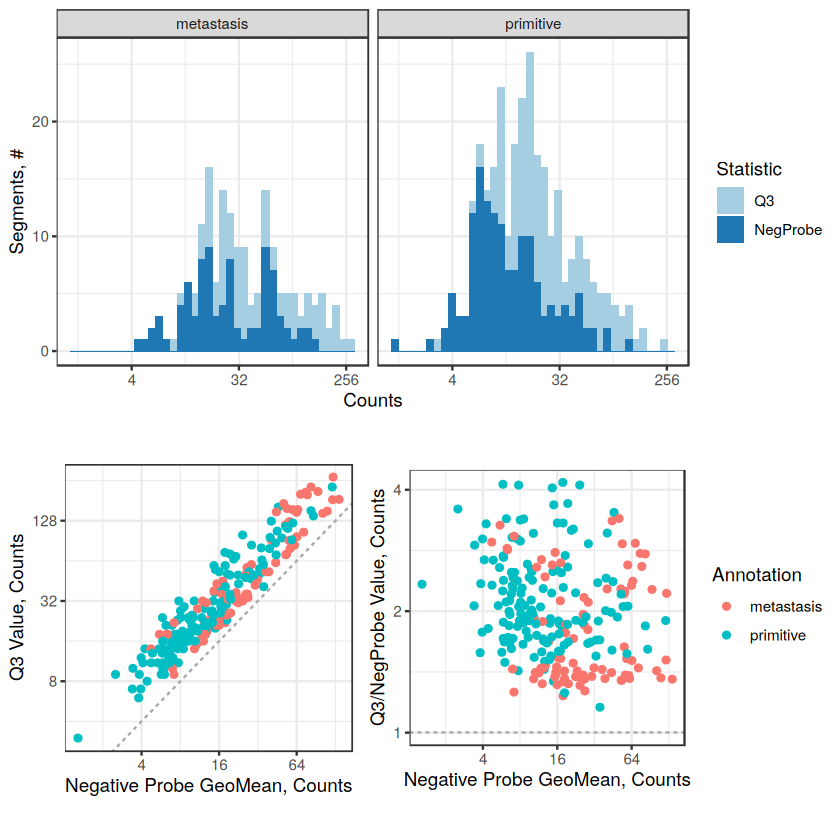

In [19]:
library(reshape2)  # for melt
library(cowplot)   # for plot_grid

# Graph Q3 value vs negGeoMean of Negatives
ann_of_interest <- "primitive_metastasis"
Stat_data <- 
        data.frame(row.names = colnames(exprs(target_demoData)),
                   Segment = colnames(exprs(target_demoData)),
                   Annotation = pData(target_demoData)[, ann_of_interest],
                   Q3 = unlist(apply(exprs(target_demoData), 2,
                                     quantile, 0.75, na.rm = TRUE)),
                   NegProbe = exprs(target_demoData)[neg_probes, ])
Stat_data_m <- melt(Stat_data, measure.vars = c("Q3", "NegProbe"),
                    variable.name = "Statistic", value.name = "Value")

plt1 <- ggplot(Stat_data_m,
               aes(x = Value, fill = Statistic)) +
geom_histogram(bins = 40) + theme_bw() +
scale_x_continuous(trans = "log2") +
facet_wrap(~Annotation, nrow = 1) + 
scale_fill_brewer(palette = 3, type = "qual") +
labs(x = "Counts", y = "Segments, #")
#plt1
            plt2 <- ggplot(Stat_data,
                           aes(x = NegProbe, y = Q3, color = Annotation)) +
geom_abline(intercept = 0, slope = 1, lty = "dashed", color = "darkgray") +
geom_point() + guides(color = "none") + theme_bw() +
scale_x_continuous(trans = "log2") + 
scale_y_continuous(trans = "log2") +
theme(aspect.ratio = 1) +
labs(x = "Negative Probe GeoMean, Counts", y = "Q3 Value, Counts")
#plt2
                plt3 <- ggplot(Stat_data,
                               aes(x = NegProbe, y = Q3 / NegProbe, color = Annotation)) +
geom_hline(yintercept = 1, lty = "dashed", color = "darkgray") +
geom_point() + theme_bw() +
scale_x_continuous(trans = "log2") + 
scale_y_continuous(trans = "log2") +
theme(aspect.ratio = 1) +
labs(x = "Negative Probe GeoMean, Counts", y = "Q3/NegProbe Value, Counts")
#plt3
                btm_row <- plot_grid(plt2, plt3, nrow = 1, labels = c("", ""),
                                     rel_widths = c(0.43,0.57))
plot_grid(plt1, btm_row, ncol = 1, labels = c("", ""))

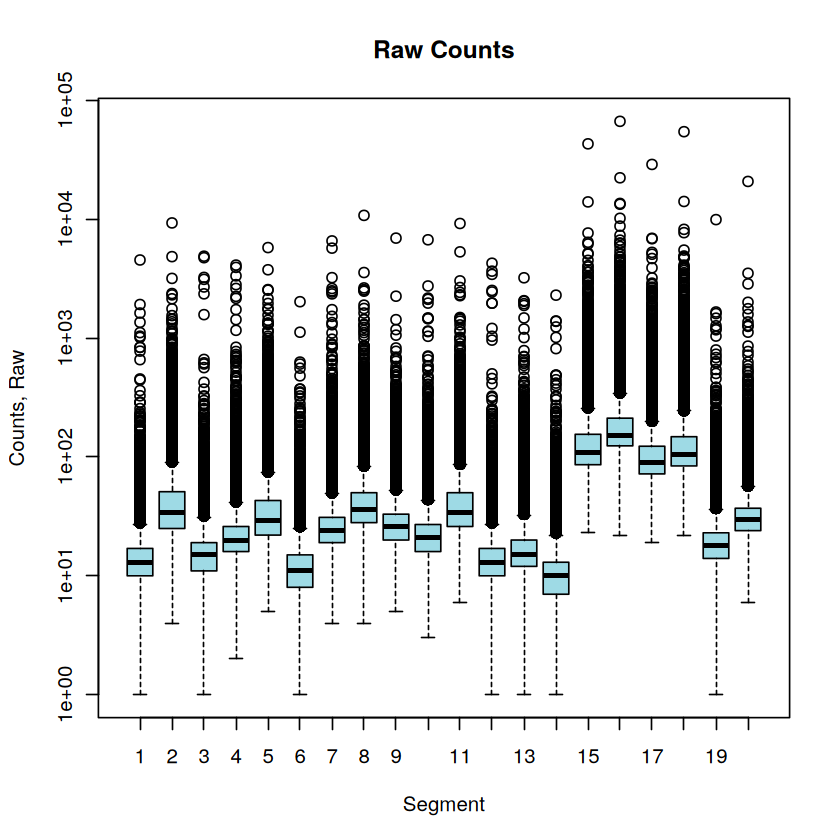

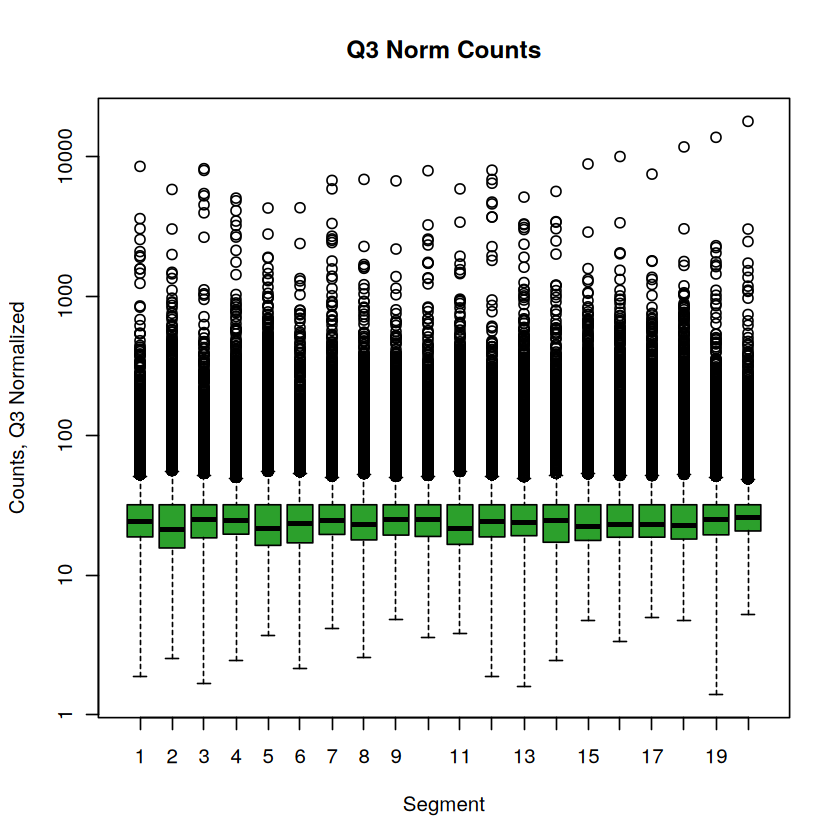

 [1] "slide name"                   "roi"                         
 [3] "segment"                      "segment_area"                
 [5] "roi_area"                     "nuclei"                      
 [7] "cd68_type"                    "segment_nuclei"              
 [9] "pancreas_colon"               "primitive_metastasis"        
[11] "metastasis_location"          "patient_id"                  
[13] "location"                     "ck_score"                    
[15] "cd45_score"                   "cd68_score"                  
[17] "NOIGR"                        "date sample"                 
[19] "stage"                        "type of chemo"               
[21] "treatment_duration_months"    "Sex"                         
[23] "date of birth"                "patient id"                  
[25] "specific_location"            "NegGeoMean_Hs_R_NGS_WTA_v1.0"
[27] "NegGeoSD_Hs_R_NGS_WTA_v1.0"   "LOQ"                         
[29] "GenesDetected"                "GeneDetectionRate"       

Features  Samples 
   13148      235

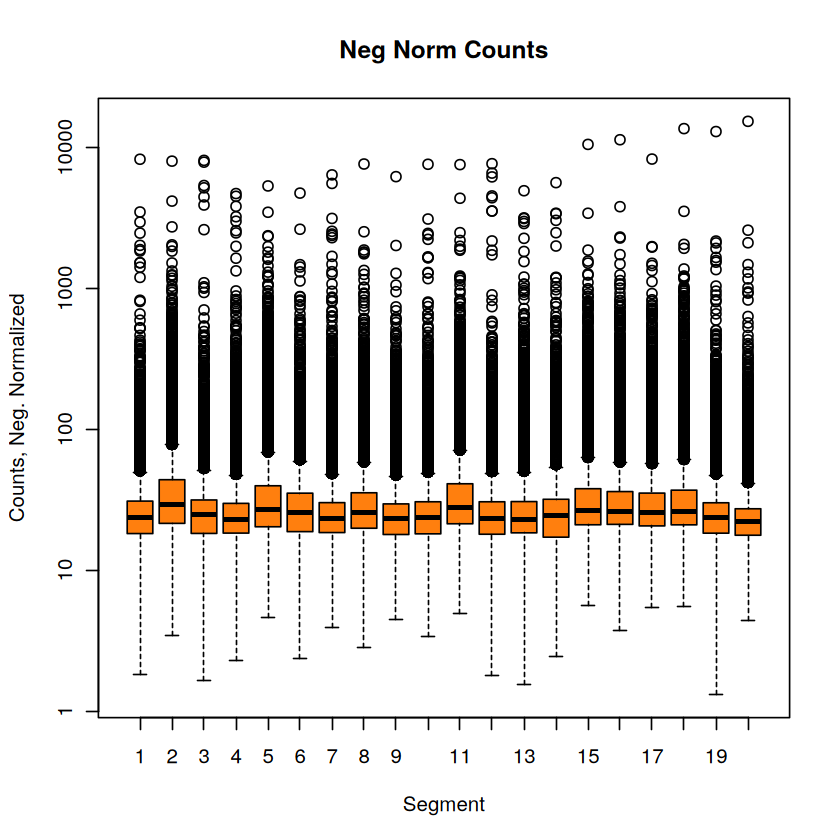

In [20]:
# Q3 norm (75th percentile) for WTA/CTA  with or without custom spike-ins
target_demoData <- normalize(target_demoData ,
                             norm_method = "quant", 
                             desiredQuantile = .75,
                             toElt = "q_norm")

# Background normalization for WTA/CTA without custom spike-in
target_demoData <- normalize(target_demoData ,
                             norm_method = "neg", 
                             fromElt = "exprs",
                             toElt = "neg_norm")

len <- dim(target_demoData)[2][]
str <- paste(len,collape="")


# visualize the first 10 segments with each normalization method
boxplot(exprs(target_demoData)[,1:20],
        col = "#9EDAE5", main = "Raw Counts",
        log = "y", names = 1:20, xlab = "Segment",
        ylab = "Counts, Raw")

boxplot(assayDataElement(target_demoData[,1:20], elt = "q_norm"),
        col = "#2CA02C", main = "Q3 Norm Counts",
        log = "y", names = 1:20, xlab = "Segment",
        ylab = "Counts, Q3 Normalized")

boxplot(assayDataElement(target_demoData[,1:20], elt = "neg_norm"),
        col = "#FF7F0E", main = "Neg Norm Counts",
        log = "y", names = 1:20, xlab = "Segment",
        ylab = "Counts, Neg. Normalized")
print(colnames(pData(target_demoData)))
print(nrow(pData(target_demoData)))
dim(target_demoData)

# Save Object

In [22]:
save(target_demoData,file = 'target_demoData.RData')


In [23]:
normalized_counts <- assayDataElement(target_demoData , elt = "q_norm" )
normalized_counts <- as.data.frame(normalized_counts)
print(dim(normalized_counts))
write.csv(normalized_counts, file = "geomx_normalized_counts.csv", row.names = TRUE)

[1] 13148   235


In [24]:
metadata <- pData(target_demoData)
metadata$LOQ <- NULL
write.table(metadata, file = "geomx_metadata.tsv", row.names = TRUE,sep='\t')